In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#function that, given the initial values, the parameters and the timestep, makes the plots
def neuronplot(feature,dt,tmax,t,I,a,b,c,d,u0,w0):
    #t=np.arange(0,tmax,dt)

    plt.plot(t,I)
    plt.title('Input Current')
    plt.xlabel('t [ms]')
    plt.ylabel('I [mA]')

    u=np.zeros(len(t))
    w=np.zeros(len(t))

    #initial values
    u[0]= u0 
    w[0]= w0

    for j in range (0,len(t)-1):

        u[j+1]= u[j]+dt*(0.04*(u[j])**2+5*u[j]+140-w[j]+I[j])
        w[j+1]= w[j]+dt*a*(b*u[j+1]-w[j])
        
        if u[j] > 30:
            u[j] = 30
            u[j+1] = c
            w[j+1] = w[j] + d

    plt.figure()
    plt.title(feature)
    plt.plot(t,u)
    plt.xlabel('t [ms]')
    plt.ylabel('u [mv]')
    plt.savefig(feature+'- Membrane Potential',format='pdf')


    plt.figure()
    plt.title(feature)
    plt.plot(u,w)
    plt.xlabel('u [mV]')
    plt.ylabel('w [a.u.]')
    plt.savefig(feature+'- Phase Plot',format='pdf')
    plt.show()





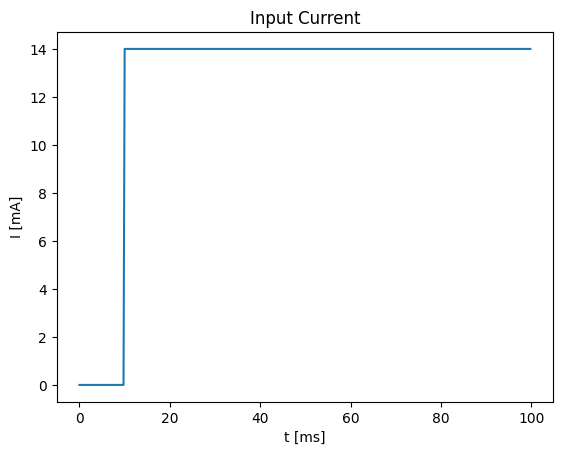

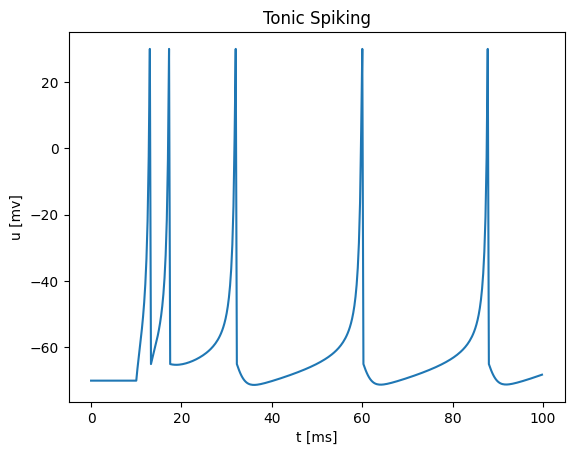

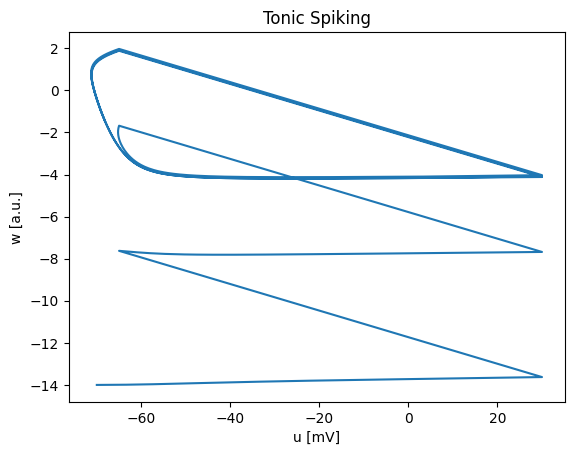

In [3]:
#(A) TONIC SPIKING
feature = 'Tonic Spiking'
dt=0.25 #timestep [ms]
tmax=100 #ms

#input current
t_input=int(tmax/10)
I_excitatory = 14
t=np.arange(0,tmax,dt)
I=np.zeros(len(t))
I[int(t_input/dt):]=I_excitatory

#initial conditions
a=0.02
b=0.2
c=-65
d=6
u0 = -70
w0 = b*u0

neuronplot(feature,dt,tmax,t,I,a,b,c,d,u0,w0)

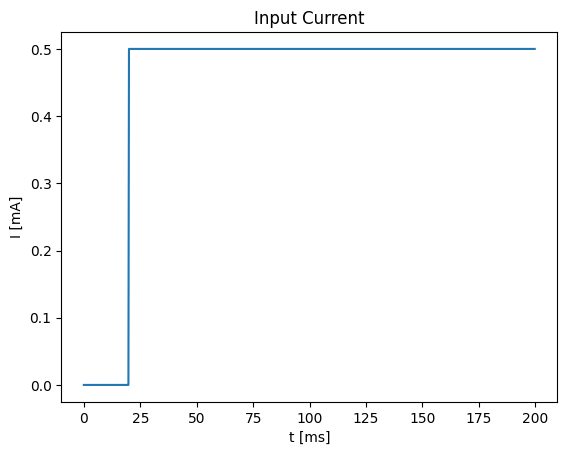

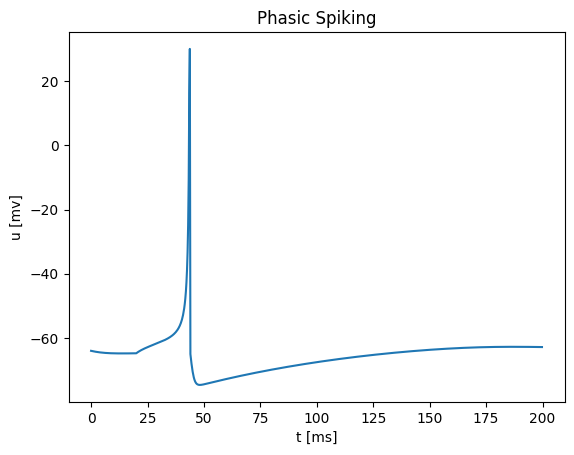

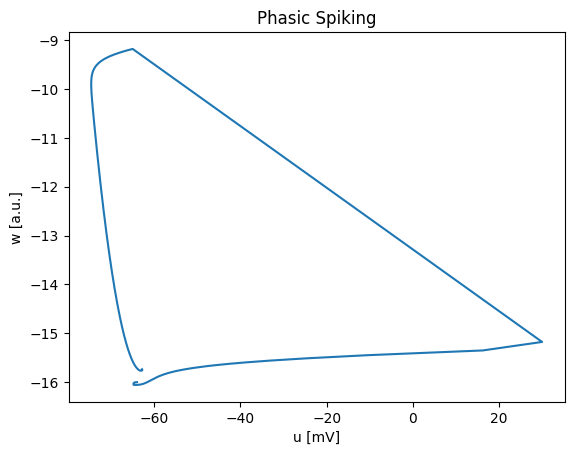

In [4]:
#(B) PHASIC SPIKING
feature = 'Phasic Spiking'
dt=0.25 #timestep [ms]
tmax=200 #ms

#input current
t_input=20
I_excitatory = 0.5
t=np.arange(0,tmax,dt)
I=np.zeros(len(t))
I[int(t_input/dt):]=I_excitatory

#initial conditions
a=0.02
b=0.25
c=-65
d=6
u0 = -64
w0 = b*u0

neuronplot(feature,dt,tmax,t,I,a,b,c,d,u0,w0)

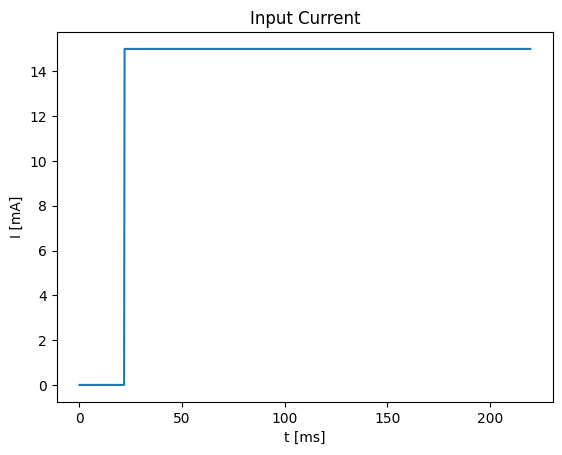

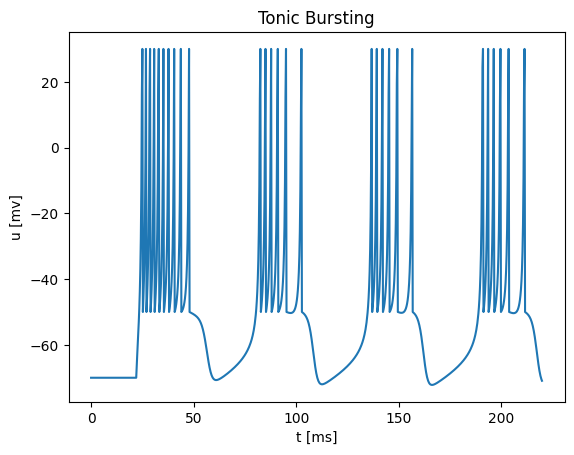

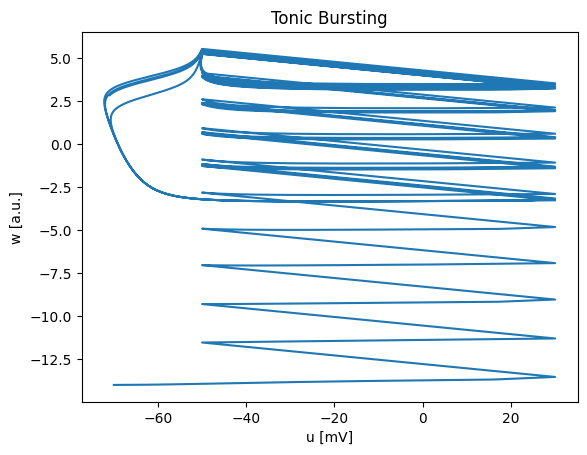

In [5]:
#(C) Tonic Bursting
feature = 'Tonic Bursting'
dt=0.25 #timestep [ms]
tmax=220 #ms

#input current
t_input=22
I_excitatory = 15
t=np.arange(0,tmax,dt)
I=np.zeros(len(t))
I[int(t_input/dt):]=I_excitatory

#initial conditions
a=0.02
b=0.2
c=-50
d=2
u0 = -70
w0 = b*u0

neuronplot(feature,dt,tmax,t,I,a,b,c,d,u0,w0)

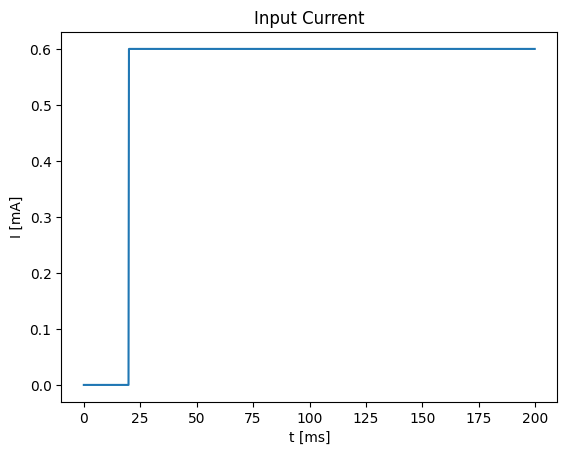

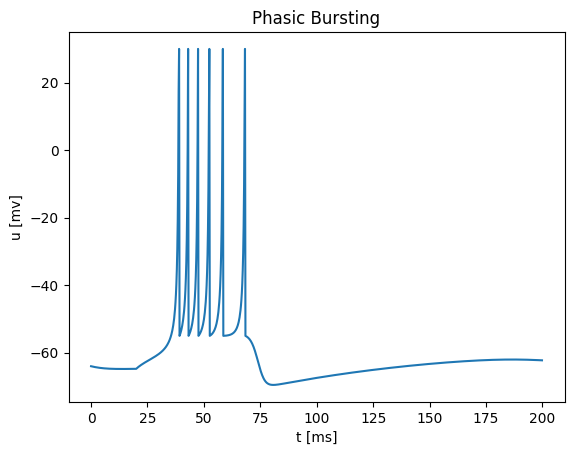

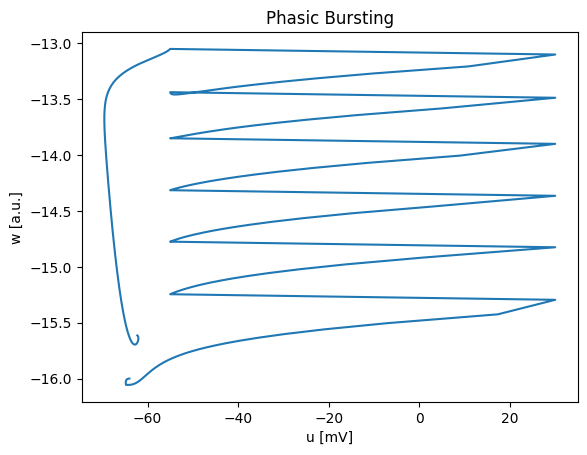

In [6]:
#(D) Phasic Bursting
feature = 'Phasic Bursting'
dt=0.2 #timestep [ms]
tmax=200 #ms

#input current
t_input=20
I_excitatory=0.6
t=np.arange(0,tmax,dt)
I=np.zeros(len(t))
I[int(t_input/dt):]=I_excitatory

#initial conditions
a=0.02
b=0.25
c=-55
d=0.05
u0=-64
w0=b*u0

neuronplot(feature,dt,tmax,t,I,a,b,c,d,u0,w0)

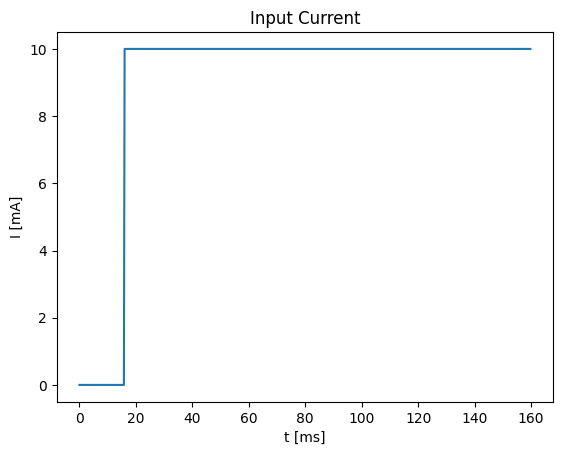

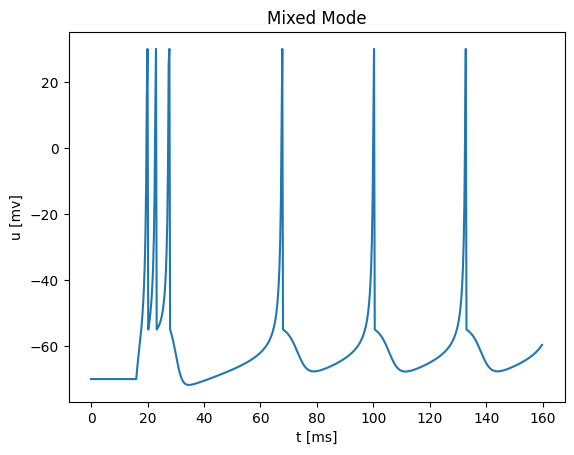

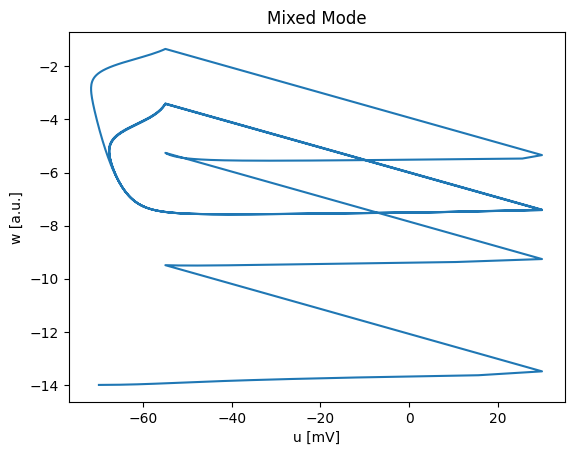

In [7]:
#(E) Mixed Mode
feature = 'Mixed Mode'
dt=0.25 #timestep [ms]
tmax=160 #ms

#input current
t_input=int(tmax/10)
I_excitatory=10
t=np.arange(0,tmax,dt)
I=np.zeros(len(t))
I[int(t_input/dt):]=I_excitatory

#initial conditions
a=0.02
b=0.2
c=-55
d=4
u0=-70
w0=b*u0

neuronplot(feature,dt,tmax,t,I,a,b,c,d,u0,w0)

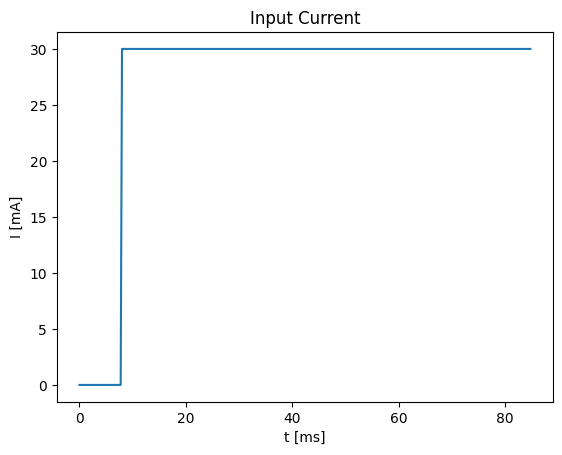

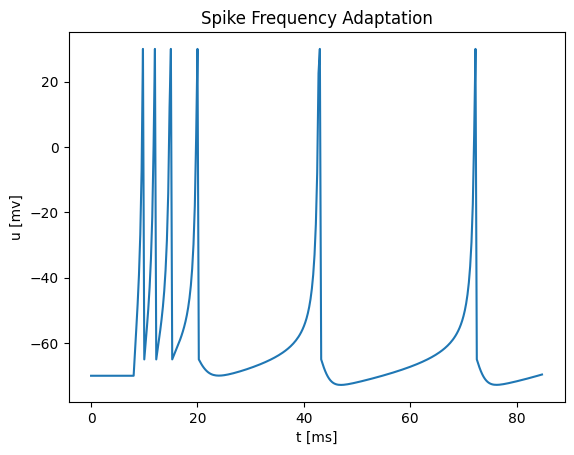

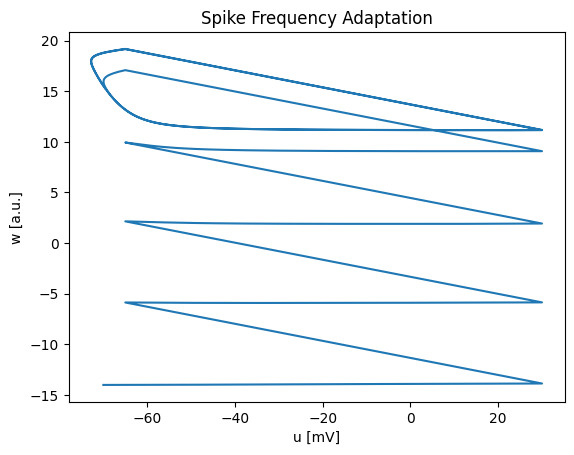

In [8]:
#(F) Spike Frequency Adaptation
feature = 'Spike Frequency Adaptation'
dt=0.25 #timestep [ms]
tmax=85 #ms

#input current
t_input=int(tmax/10)
I_excitatory=30
t=np.arange(0,tmax,dt)
I=np.zeros(len(t))
I[int(t_input/dt):]=I_excitatory

#initial conditions
a=0.01
b=0.2
c=-65
d=8
u0=-70
w0=b*u0

neuronplot(feature,dt,tmax,t,I,a,b,c,d,u0,w0)

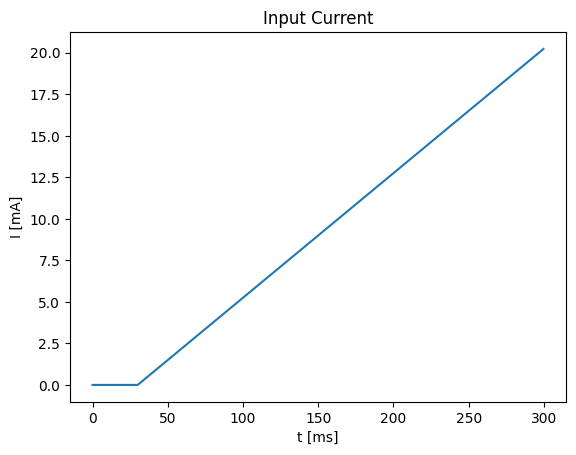

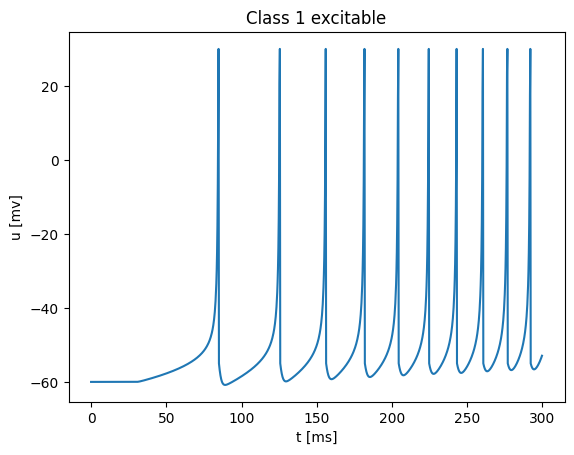

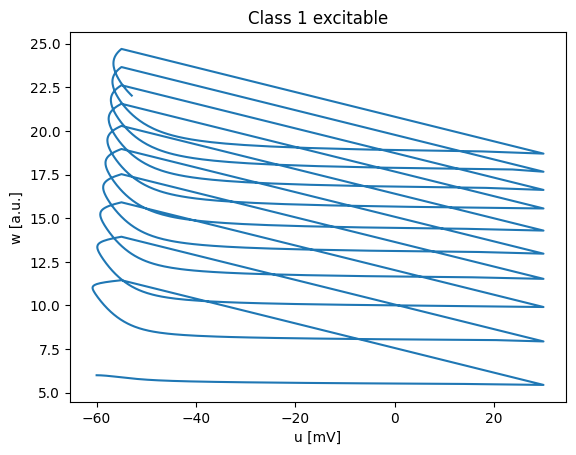

In [9]:
#(G) Class 1 excitable
feature = 'Class 1 excitable'
dt=0.25 #timestep [ms]
tmax=300 #ms
t=np.arange(0,tmax,dt)

#input current
t1=30
I=np.zeros(len(t))


for j in range(0,len(I)):
    if t[j] > t1:
        I[j] = 0.075*(t[j]-t1)


#initial conditions
a=0.02
b=-0.1
c=-55
d=6
u0=-60
w0=b*u0

#in this case (G) the differential equations are slightly different, so I write again the code instead of using the function:

plt.plot(t,I)
plt.title('Input Current')
plt.xlabel('t [ms]')
plt.ylabel('I [mA]')

u=np.zeros(len(t))
w=np.zeros(len(t))

#initial values
u[0]= u0 
w[0]= w0


for j in range (0,len(t)-1):

    u[j+1]= u[j]+dt*(0.04*(u[j])**2+4.1*u[j]+108-w[j]+I[j])
    w[j+1]= w[j]+dt*a*(b*u[j+1]-w[j])
    
    if u[j] > 30:
        u[j] = 30
        u[j+1] = c
        w[j+1] = w[j] + d

plt.figure()
plt.title(feature)
plt.plot(t,u)
plt.xlabel('t [ms]')
plt.ylabel('u [mv]')
plt.savefig(feature+'- Membrane Potential',format='pdf')


plt.figure()
plt.title(feature)
plt.plot(u,w)
plt.xlabel('u [mV]')
plt.ylabel('w [a.u.]')
plt.savefig(feature+'- Phase Plot',format='pdf')
plt.show()

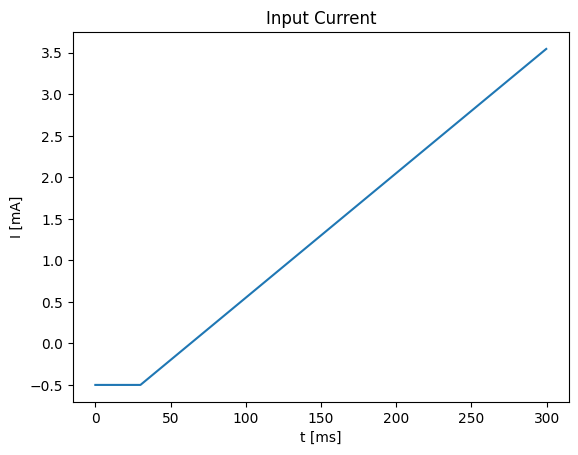

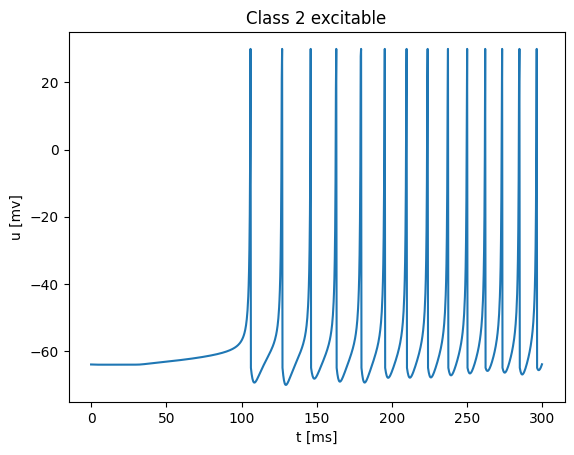

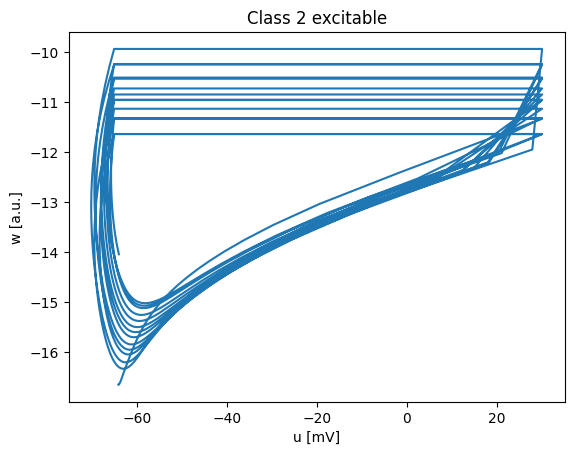

In [10]:
#(H) Class 2 excitable
feature = 'Class 2 excitable'
dt=0.25 #timestep [ms]
tmax=300 #ms
t=np.arange(0,tmax,dt)

#input current
t1=30

I=np.zeros(len(t))


for j in range(0,len(I)):
    if t[j] > t1:
        I[j] = -0.5+(0.015*(t[j]-t1))
    else:
        I[j] = -0.5


#initial conditions
a=0.2
b=0.26
c=-65
d=0
u0=-64
w0=b*u0

neuronplot(feature,dt,tmax,t,I,a,b,c,d,u0,w0)

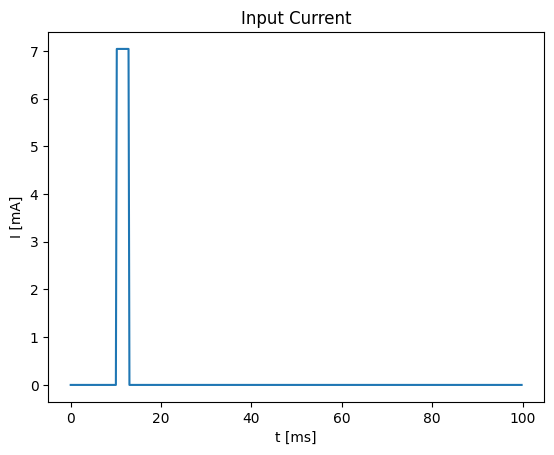

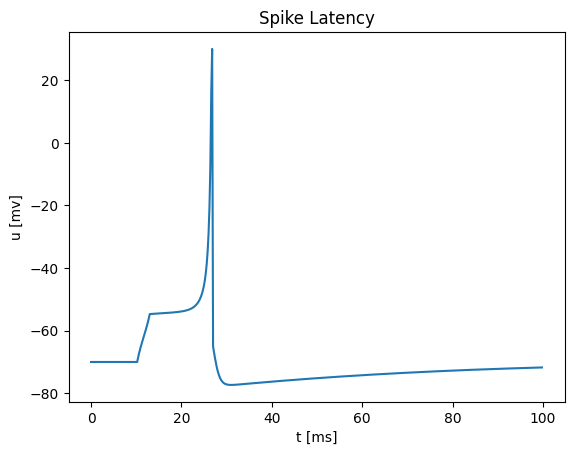

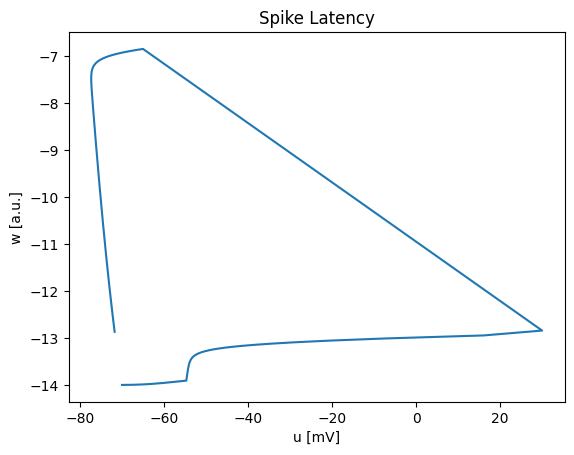

In [11]:
#(I) Spike Latency
feature = 'Spike Latency'
dt=0.2 #timestep [ms]
tmax=100 #ms
t=np.arange(0,tmax,dt)

#input current
t1=int(tmax/10)
I=np.zeros(len(t))
for j in range(0,len(I)):
    if t[j] > t1 and t[j] < t1 +3:
        I[j] = 7.04
        
#initial conditions
a=0.02
b=0.2
c=-65
d=6
u0=-70
w0=b*u0

neuronplot(feature,dt,tmax,t,I,a,b,c,d,u0,w0)

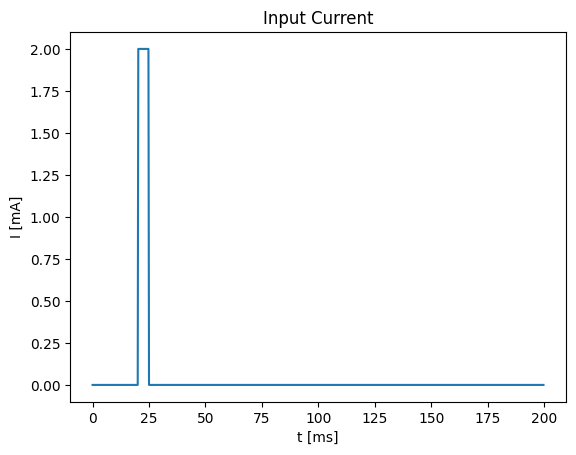

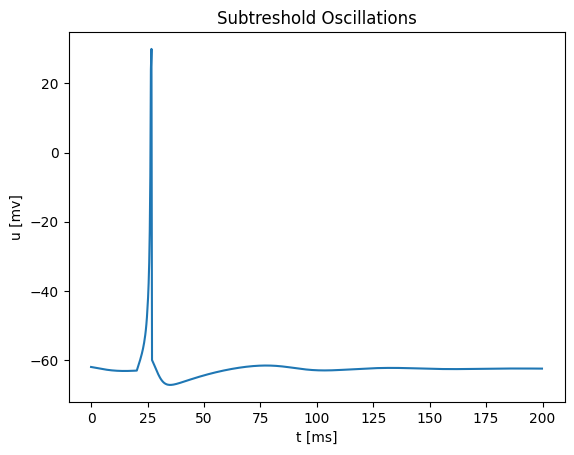

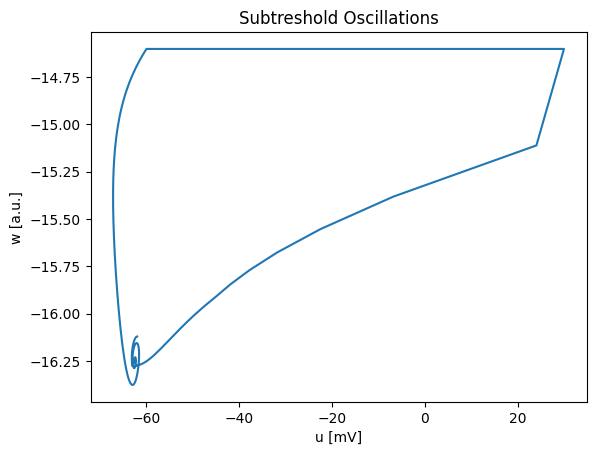

In [12]:
#(J) Subtreshold Oscillations
feature = 'Subtreshold Oscillations'
dt=0.25 #timestep [ms]
tmax=200 #ms
t=np.arange(0,tmax,dt)

#input current
t1=int(tmax/10)
I=np.zeros(len(t))
for j in range(0,len(I)):
    if t[j] > t1 and t[j] < t1 +5:
        I[j] = 2
        
#initial conditions
a=0.05
b=0.26
c=-60
d=0
u0=-62
w0=b*u0

neuronplot(feature,dt,tmax,t,I,a,b,c,d,u0,w0)

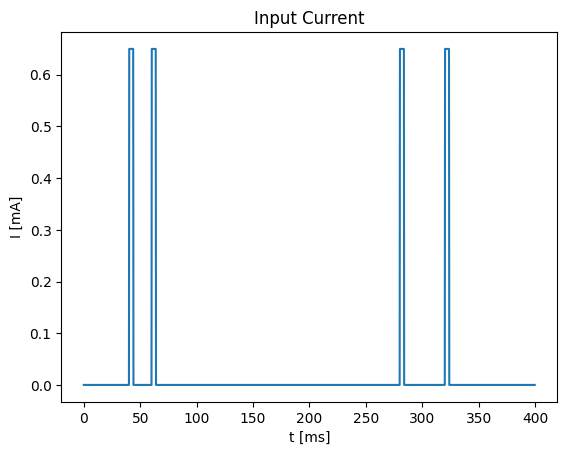

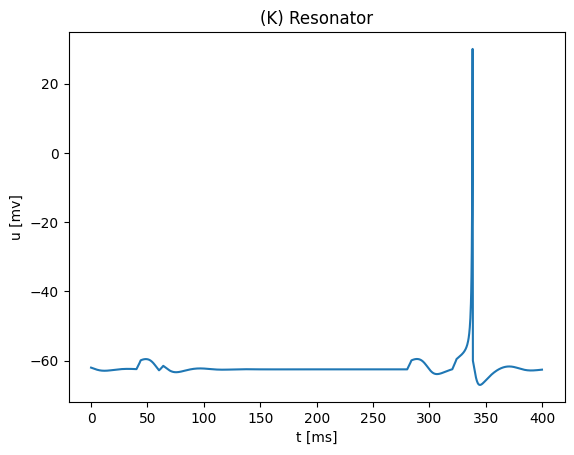

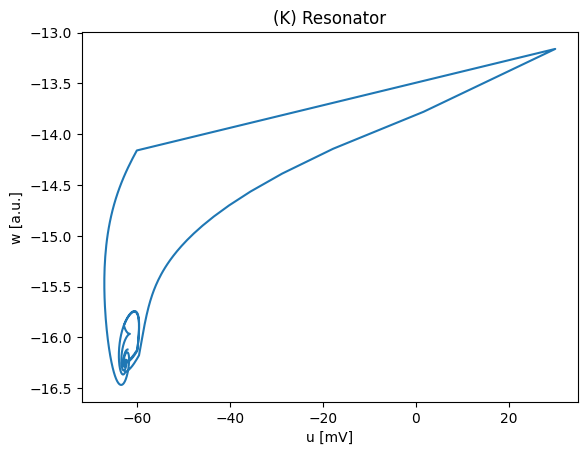

In [13]:
#(K) Resonator
feature = '(K) Resonator'
dt=0.25 #timestep [ms]
tmax=400 #ms
t=np.arange(0,tmax,dt)

#input current
t1=int(tmax/10)
t2=t1+20
t3=0.7*tmax
t4=t3+40
I=np.zeros(len(t))
for j in range(0,len(I)):
    if (t[j] > t1 and t[j] < t1 +4) | (t[j] > t2 and t[j] < t2 +4) | (t[j] > t3 and t[j] < t3 +4) | (t[j] > t4 and t[j] < t4 +4)  :
        I[j] = 0.65
        
#initial conditions
a=0.1
b=0.26
c=-60
d=-1
u0=-62
w0=b*u0

neuronplot(feature,dt,tmax,t,I,a,b,c,d,u0,w0)

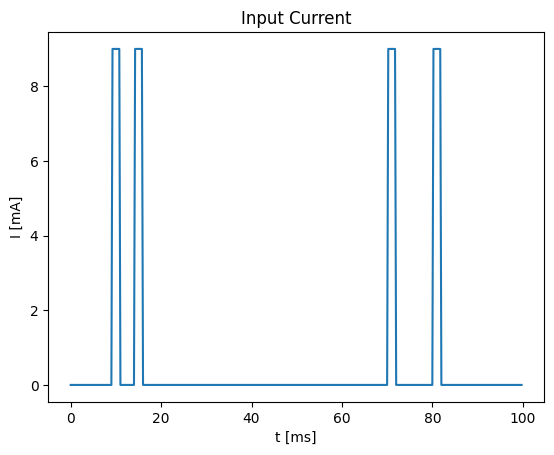

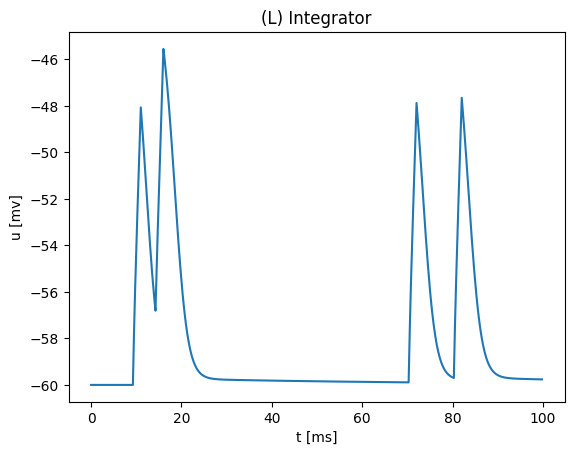

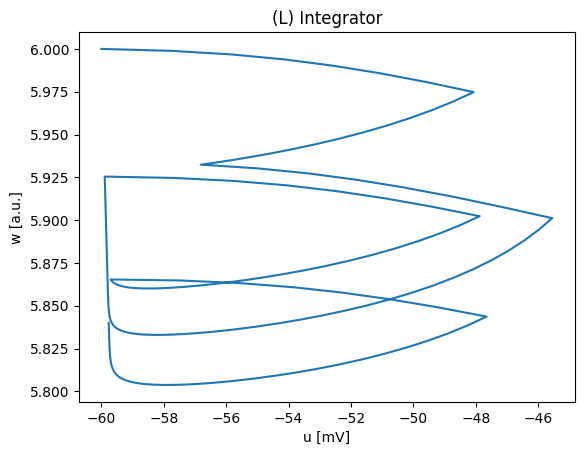

In [14]:
#(L) Integrator
feature = '(L) Integrator'
dt=0.25 #timestep [ms]
tmax=100 #ms
t=np.arange(0,tmax,dt)

#input current
t1=int(tmax/11)
t2=t1+5
t3=0.7*tmax
t4=t3+10
I=np.zeros(len(t))
for j in range(0,len(I)):
    if (t[j] > t1 and t[j] < t1 +2) | (t[j] > t2 and t[j] < t2 +2) | (t[j] > t3 and t[j] < t3 +2) | (t[j] > t4 and t[j] < t4 +2)  :
        I[j] = 9
        
#initial conditions
a=0.02
b=-0.1
c=-55
d=6
u0=-60
w0=b*u0

#in this case (L) the differential equations are slightly different, so I write again the code instead of using the function:

plt.plot(t,I)
plt.title('Input Current')
plt.xlabel('t [ms]')
plt.ylabel('I [mA]')

u=np.zeros(len(t))
w=np.zeros(len(t))

#initial values
u[0]= u0 
w[0]= w0


for j in range (0,len(t)-1):

    u[j+1]= u[j]+dt*(0.04*(u[j])**2+4.1*u[j]+108-w[j]+I[j])
    w[j+1]= w[j]+dt*a*(b*u[j+1]-w[j])
    
    if u[j] > 30:
        u[j] = 30
        u[j+1] = c
        w[j+1] = w[j] + d

plt.figure()
plt.title(feature)
plt.plot(t,u)
plt.xlabel('t [ms]')
plt.ylabel('u [mv]')
plt.savefig(feature+'- Membrane Potential',format='pdf')


plt.figure()
plt.title(feature)
plt.plot(u,w)
plt.xlabel('u [mV]')
plt.ylabel('w [a.u.]')
plt.savefig(feature+'- Phase Plot',format='pdf')
plt.show()

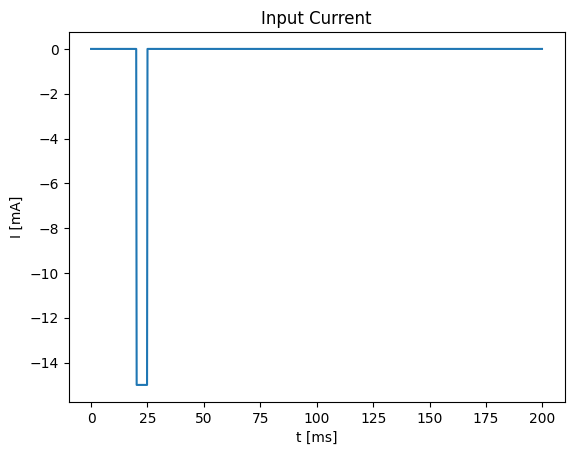

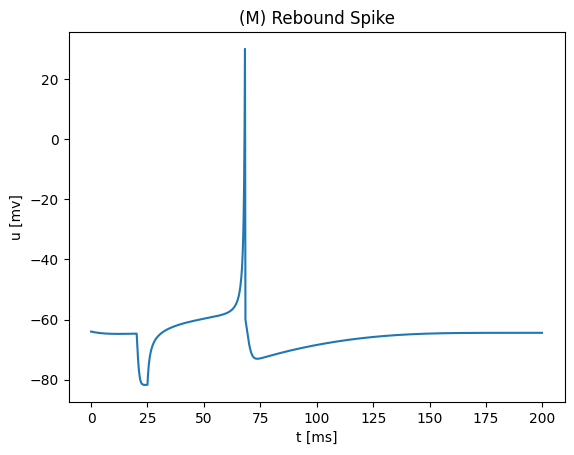

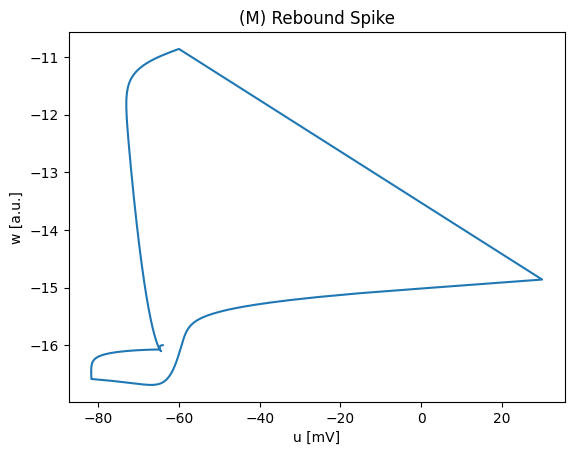

In [15]:
#(M) Rebound Spike
feature = '(M) Rebound Spike'
dt=0.2 #timestep [ms]
tmax=200 #ms
t=np.arange(0,tmax,dt)

#input current
t1=20
I=np.zeros(len(t))

for j in range(0,len(I)):
    if t[j] > t1 and t[j] < t1 + 5:
        I[j] = -15
        
#initial conditions
a=0.03
b=0.25
c=-60
d=4
u0=-64
w0=b*u0

neuronplot(feature,dt,tmax,t,I,a,b,c,d,u0,w0)

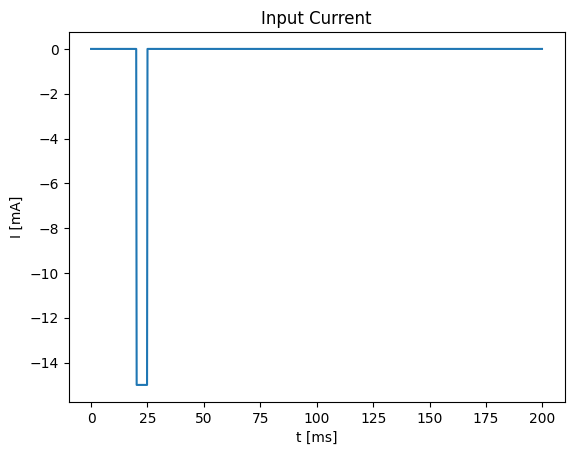

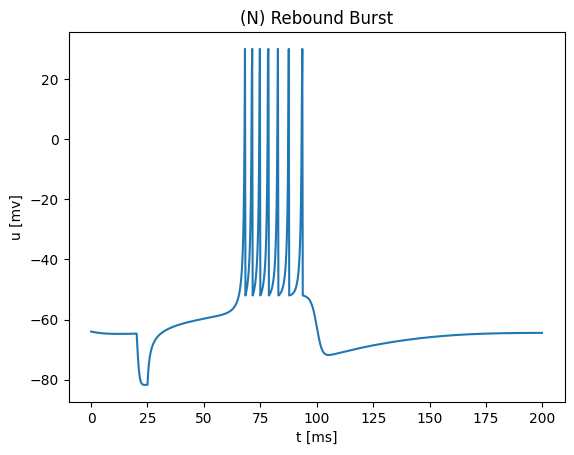

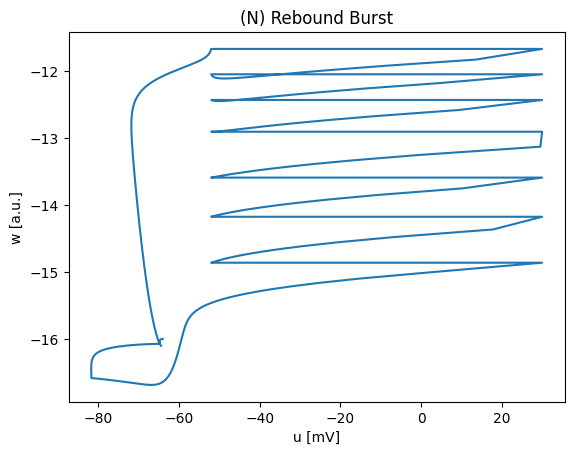

In [16]:
#(N) Rebound Burst
feature = '(N) Rebound Burst'
dt=0.2 #timestep [ms]
tmax=200 #ms
t=np.arange(0,tmax,dt)

#input current
t1=20
I=np.zeros(len(t))

for j in range(0,len(I)):
    if t[j] > t1 and t[j] < t1 + 5:
        I[j] = -15
        
#initial conditions
a=0.03
b=0.25
c=-52
d=0
u0=-64
w0=b*u0

neuronplot(feature,dt,tmax,t,I,a,b,c,d,u0,w0)

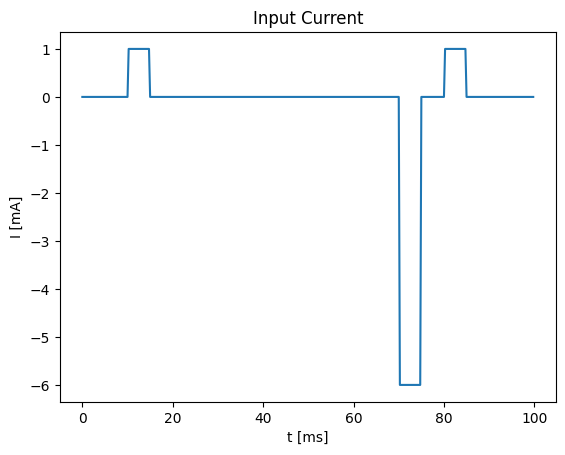

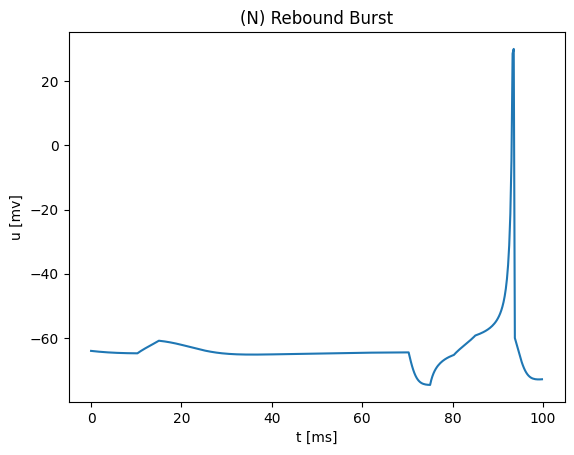

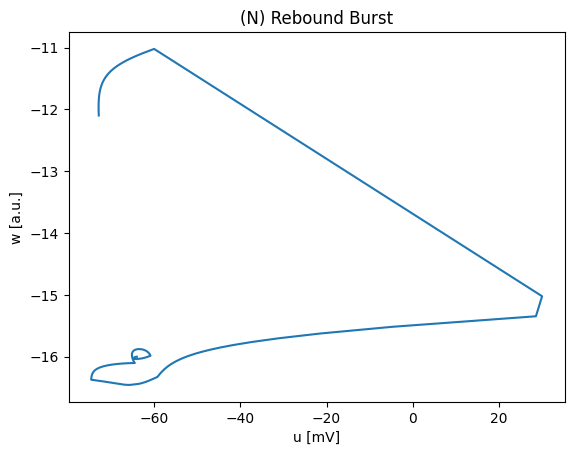

In [29]:
#(O) Threshold Variability
feature = '(N) Rebound Burst'
dt=0.25 #timestep [ms]
tmax=100 #ms
t=np.arange(0,tmax,dt)

#input current
I=np.zeros(len(t))

for j in range(0,len(I)):
    if (t[j] > 10 and t[j] < 15) | (t[j] > 80 and t[j] < 85) :
        I[j] = 1
    elif (t[j] > 70 and t[j] < 75):
        I[j] = -6
        
#initial conditions
a=0.03
b=0.25
c=-60
d=4
u0=-64
w0=b*u0

neuronplot(feature,dt,tmax,t,I,a,b,c,d,u0,w0)

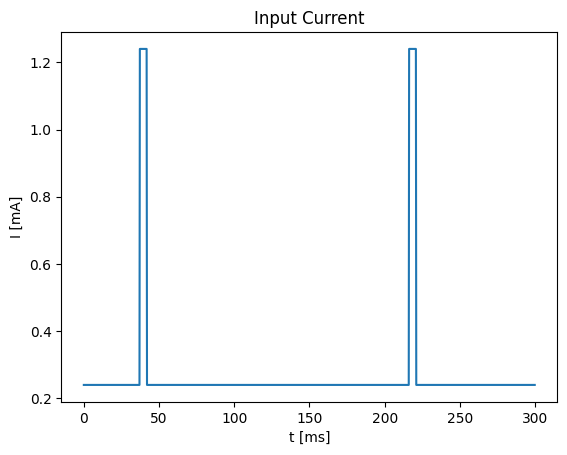

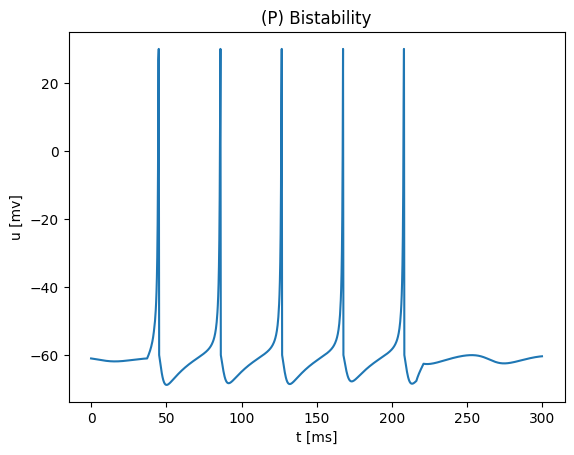

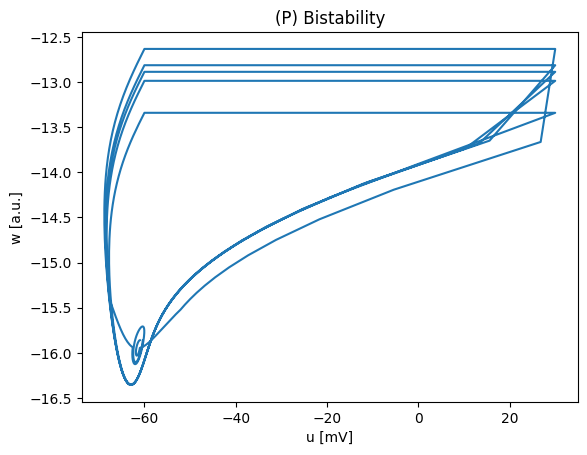

In [30]:
#(P) Bistability
feature = '(P) Bistability'
dt=0.25 #timestep [ms]
tmax=300 #ms
t=np.arange(0,tmax,dt)

#input current
t1=int(tmax/8)
t2=216

I=np.zeros(len(t))
for j in range(0,len(I)):
    if (t[j] > t1 and t[j] < t1 +5) | (t[j] > t2 and t[j] < t2 +5) :
        I[j] = 1.24
    else:
        I[j]=0.24
        
#initial conditions
a=0.1
b=0.26
c=-60
d=0
u0=-61
w0=b*u0

neuronplot(feature,dt,tmax,t,I,a,b,c,d,u0,w0)